In [31]:
import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt

def scatter_plot_bigram(edges):
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = [30, 30]
    
    if(len(edges) ==0):
        return 0;
    
    node_first = []
    node_second = []
    for edge in edges:
        node_first.append(int(edge[0]))
        node_second.append(int(edge[1]))
    largest_index = max(node_first)
    if largest_index <= min(node_second):
        node_second = [ x -largest_index for x in node_second]
    
    fig, ax = plt.subplots()
    scale = 200.0 * np.random.rand(largest_index)
    ax.scatter(node_first, node_second, c='tab:orange')

    ax.grid(True)
    plt.axis('on')
    plt.xlabel("User")
    plt.ylabel("Item")
    plt.show()

In [20]:
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
from matplotlib import cm
#plt.figure(figsize=(100,100), dpi=1)
plt.rcParams['figure.dpi'] = 40
plt.rcParams['figure.figsize'] = [200, 200]

In [21]:
raw_data=[]
with open("example.txt", encoding='utf-8') as file:
    for line in file:
        raw_data.append(line)

graph_data=dict()
nodes_first = set()
nodes_second = set()
edge=set()
edgeDict=dict()
for line in raw_data:
    l = line.split(' ')[0:2]
    nodes_first.add(int(l[0]))
    nodes_second.add(int(l[1]))
largest_nodes_first =  max(nodes_first)

for line in raw_data:
    if(largest_nodes_first < min(nodes_second)):
        edge.add((int(line.split(' ')[0]), int(line.split(' ')[1])))
    else:
        edge.add((int(line.split(' ')[0]), int(line.split(' ')[1]) + largest_nodes_first))
nodes_second = [x + largest_nodes_first for x in list(nodes_second)]
nodes = list(nodes_first) + nodes_second
edge = list(edge)
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge)

/usr/local/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


<function matplotlib.pyplot.show>

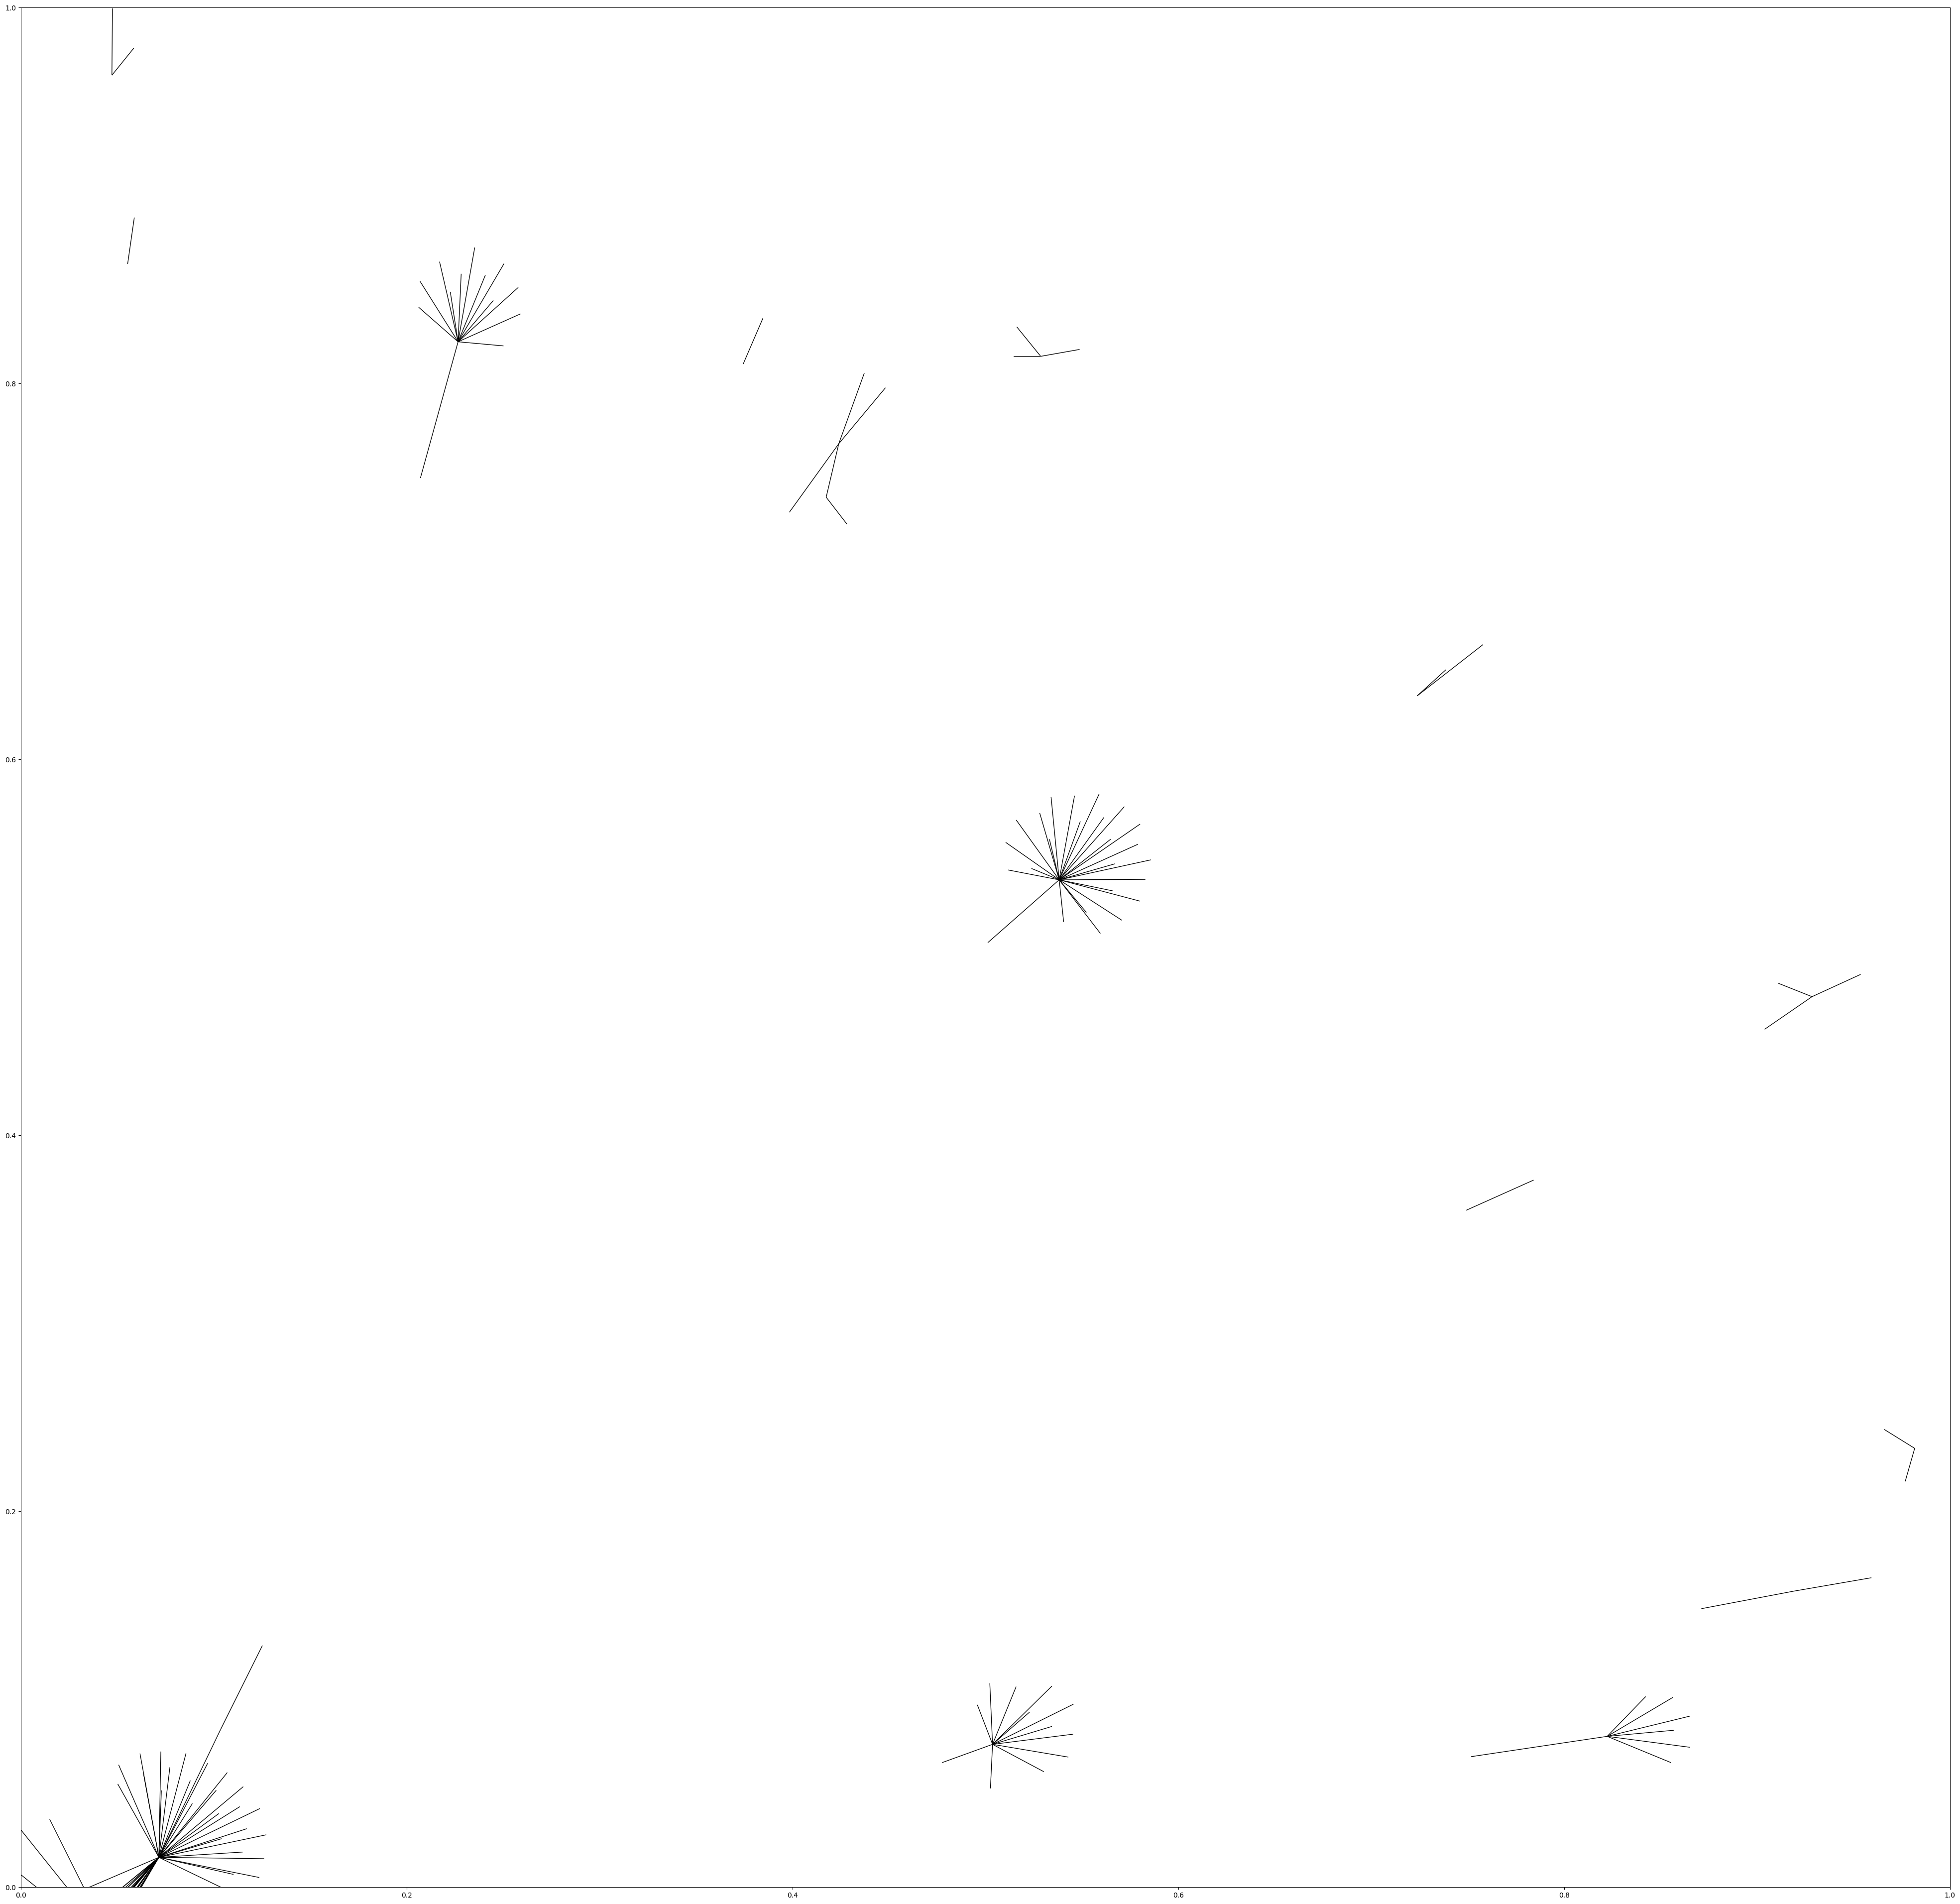

In [22]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [50, 50]

pos = nx.spring_layout(G, iterations= 50)
nx.draw_networkx_edges(G, pos)
plt.show

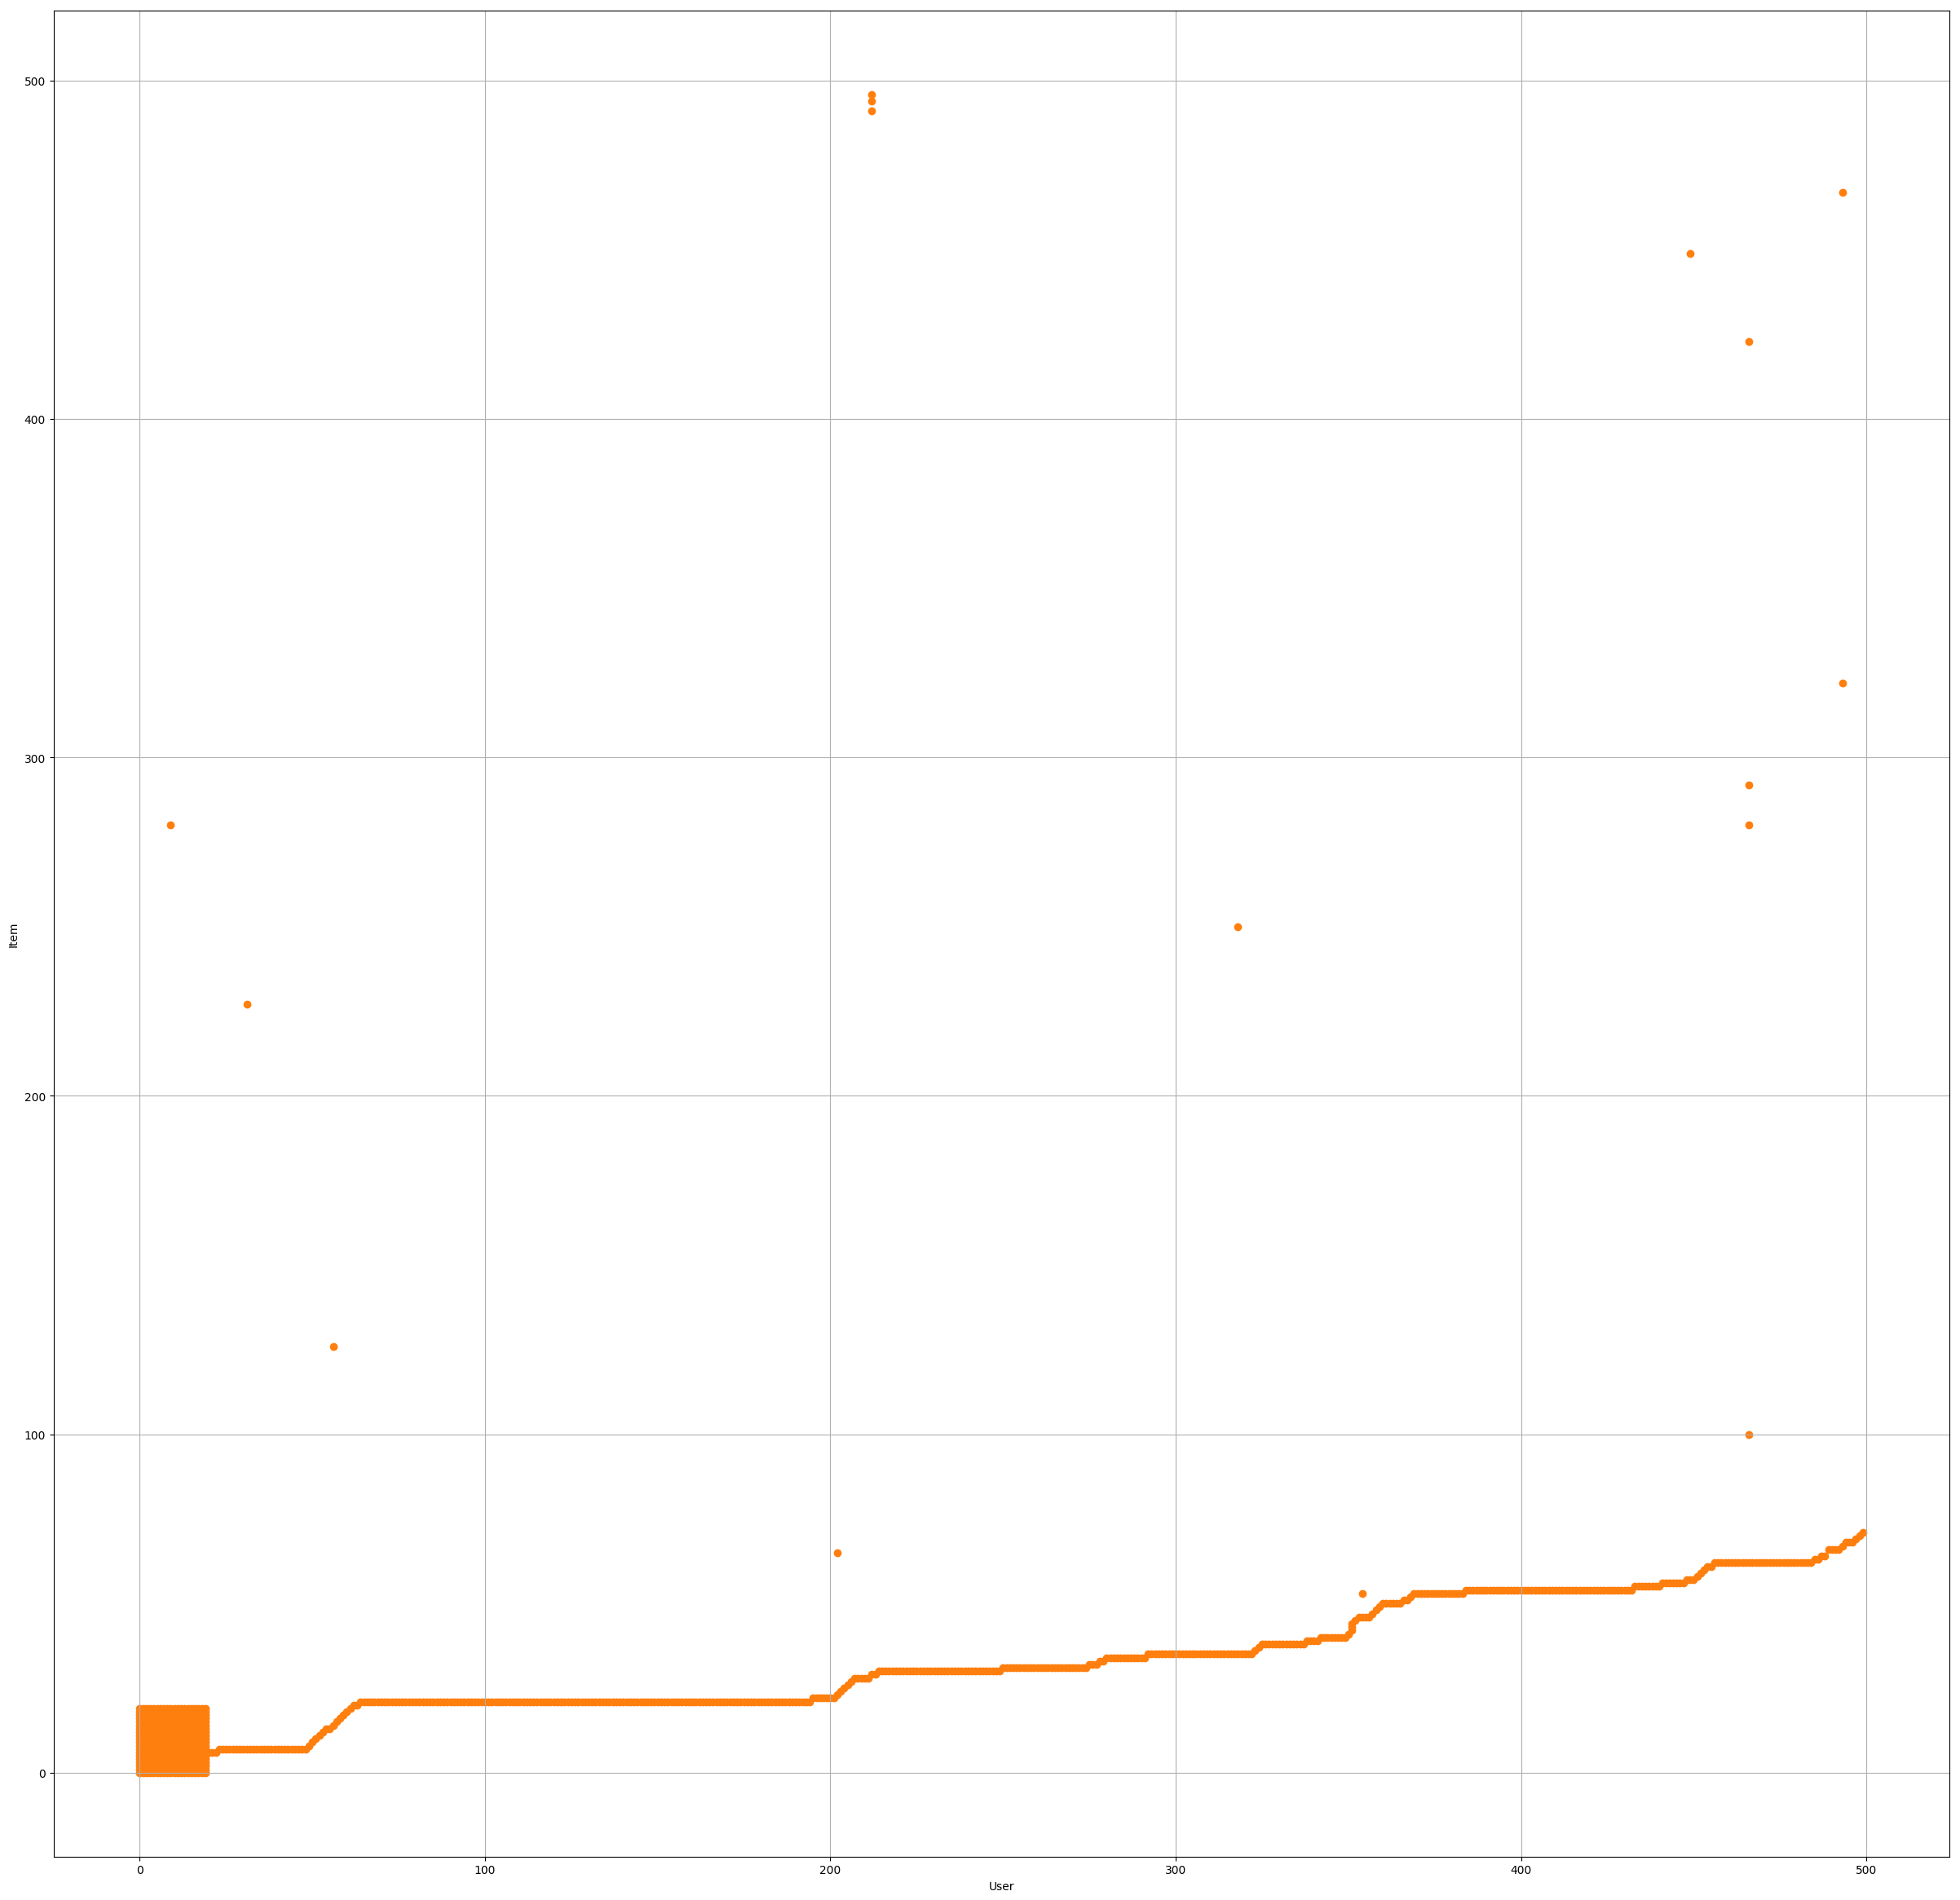

In [23]:
# vis of matrix
scatter_plot_bigram(G.edges())

In [24]:
from ge import SDNE
model = SDNE(G, hidden_size=[64, 32],)
model.train(batch_size=300, epochs=20, verbose=2)
embeddings = model.get_embeddings()
index_nodes = list(embeddings.keys())
X = [embeddings[key] for key in embeddings.keys()]

Epoch 1/20
0s - loss:  37.9964 - 2nd_loss:  37.9108 - 1st_loss:  0.0000
Epoch 2/20
0s - loss:  37.6038 - 2nd_loss:  37.5204 - 1st_loss:  0.0000
Epoch 3/20
0s - loss:  37.3113 - 2nd_loss:  37.2302 - 1st_loss:  0.0000
Epoch 4/20
0s - loss:  37.0064 - 2nd_loss:  36.9277 - 1st_loss:  0.0000
Epoch 5/20
0s - loss:  36.6483 - 2nd_loss:  36.5719 - 1st_loss:  0.0000
Epoch 6/20
0s - loss:  36.2464 - 2nd_loss:  36.1724 - 1st_loss:  0.0000
Epoch 7/20
0s - loss:  35.7861 - 2nd_loss:  35.7143 - 1st_loss:  0.0000
Epoch 8/20
0s - loss:  35.2621 - 2nd_loss:  35.1923 - 1st_loss:  0.0000
Epoch 9/20
0s - loss:  34.6569 - 2nd_loss:  34.5892 - 1st_loss:  0.0000
Epoch 10/20
0s - loss:  33.9825 - 2nd_loss:  33.9167 - 1st_loss:  0.0000
Epoch 11/20
0s - loss:  33.2206 - 2nd_loss:  33.1567 - 1st_loss:  0.0000
Epoch 12/20
0s - loss:  32.3889 - 2nd_loss:  32.3268 - 1st_loss:  0.0000
Epoch 13/20
0s - loss:  31.4982 - 2nd_loss:  31.4378 - 1st_loss:  0.0000
Epoch 14/20
0s - loss:  30.5446 - 2nd_loss:  30.4858 - 1st_l

In [25]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
print(len(X))
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

584
Estimated number of clusters: 4
Estimated number of noise points: 4


In [ ]:
#plot each cluster


In [26]:
#cal degree
def degree_count(node_len, edges):
    degree = 0
    for edge in edges:
        if ','.join(edge) not in edgeDict:
            edge = (edge[1], edge[0])
        degree += {value.split(':')[0]:float(value.split(':')[1].strip()) for value in edgeDict[','.join(edge)]}["click_total"]
    return degree /node_len

0
1


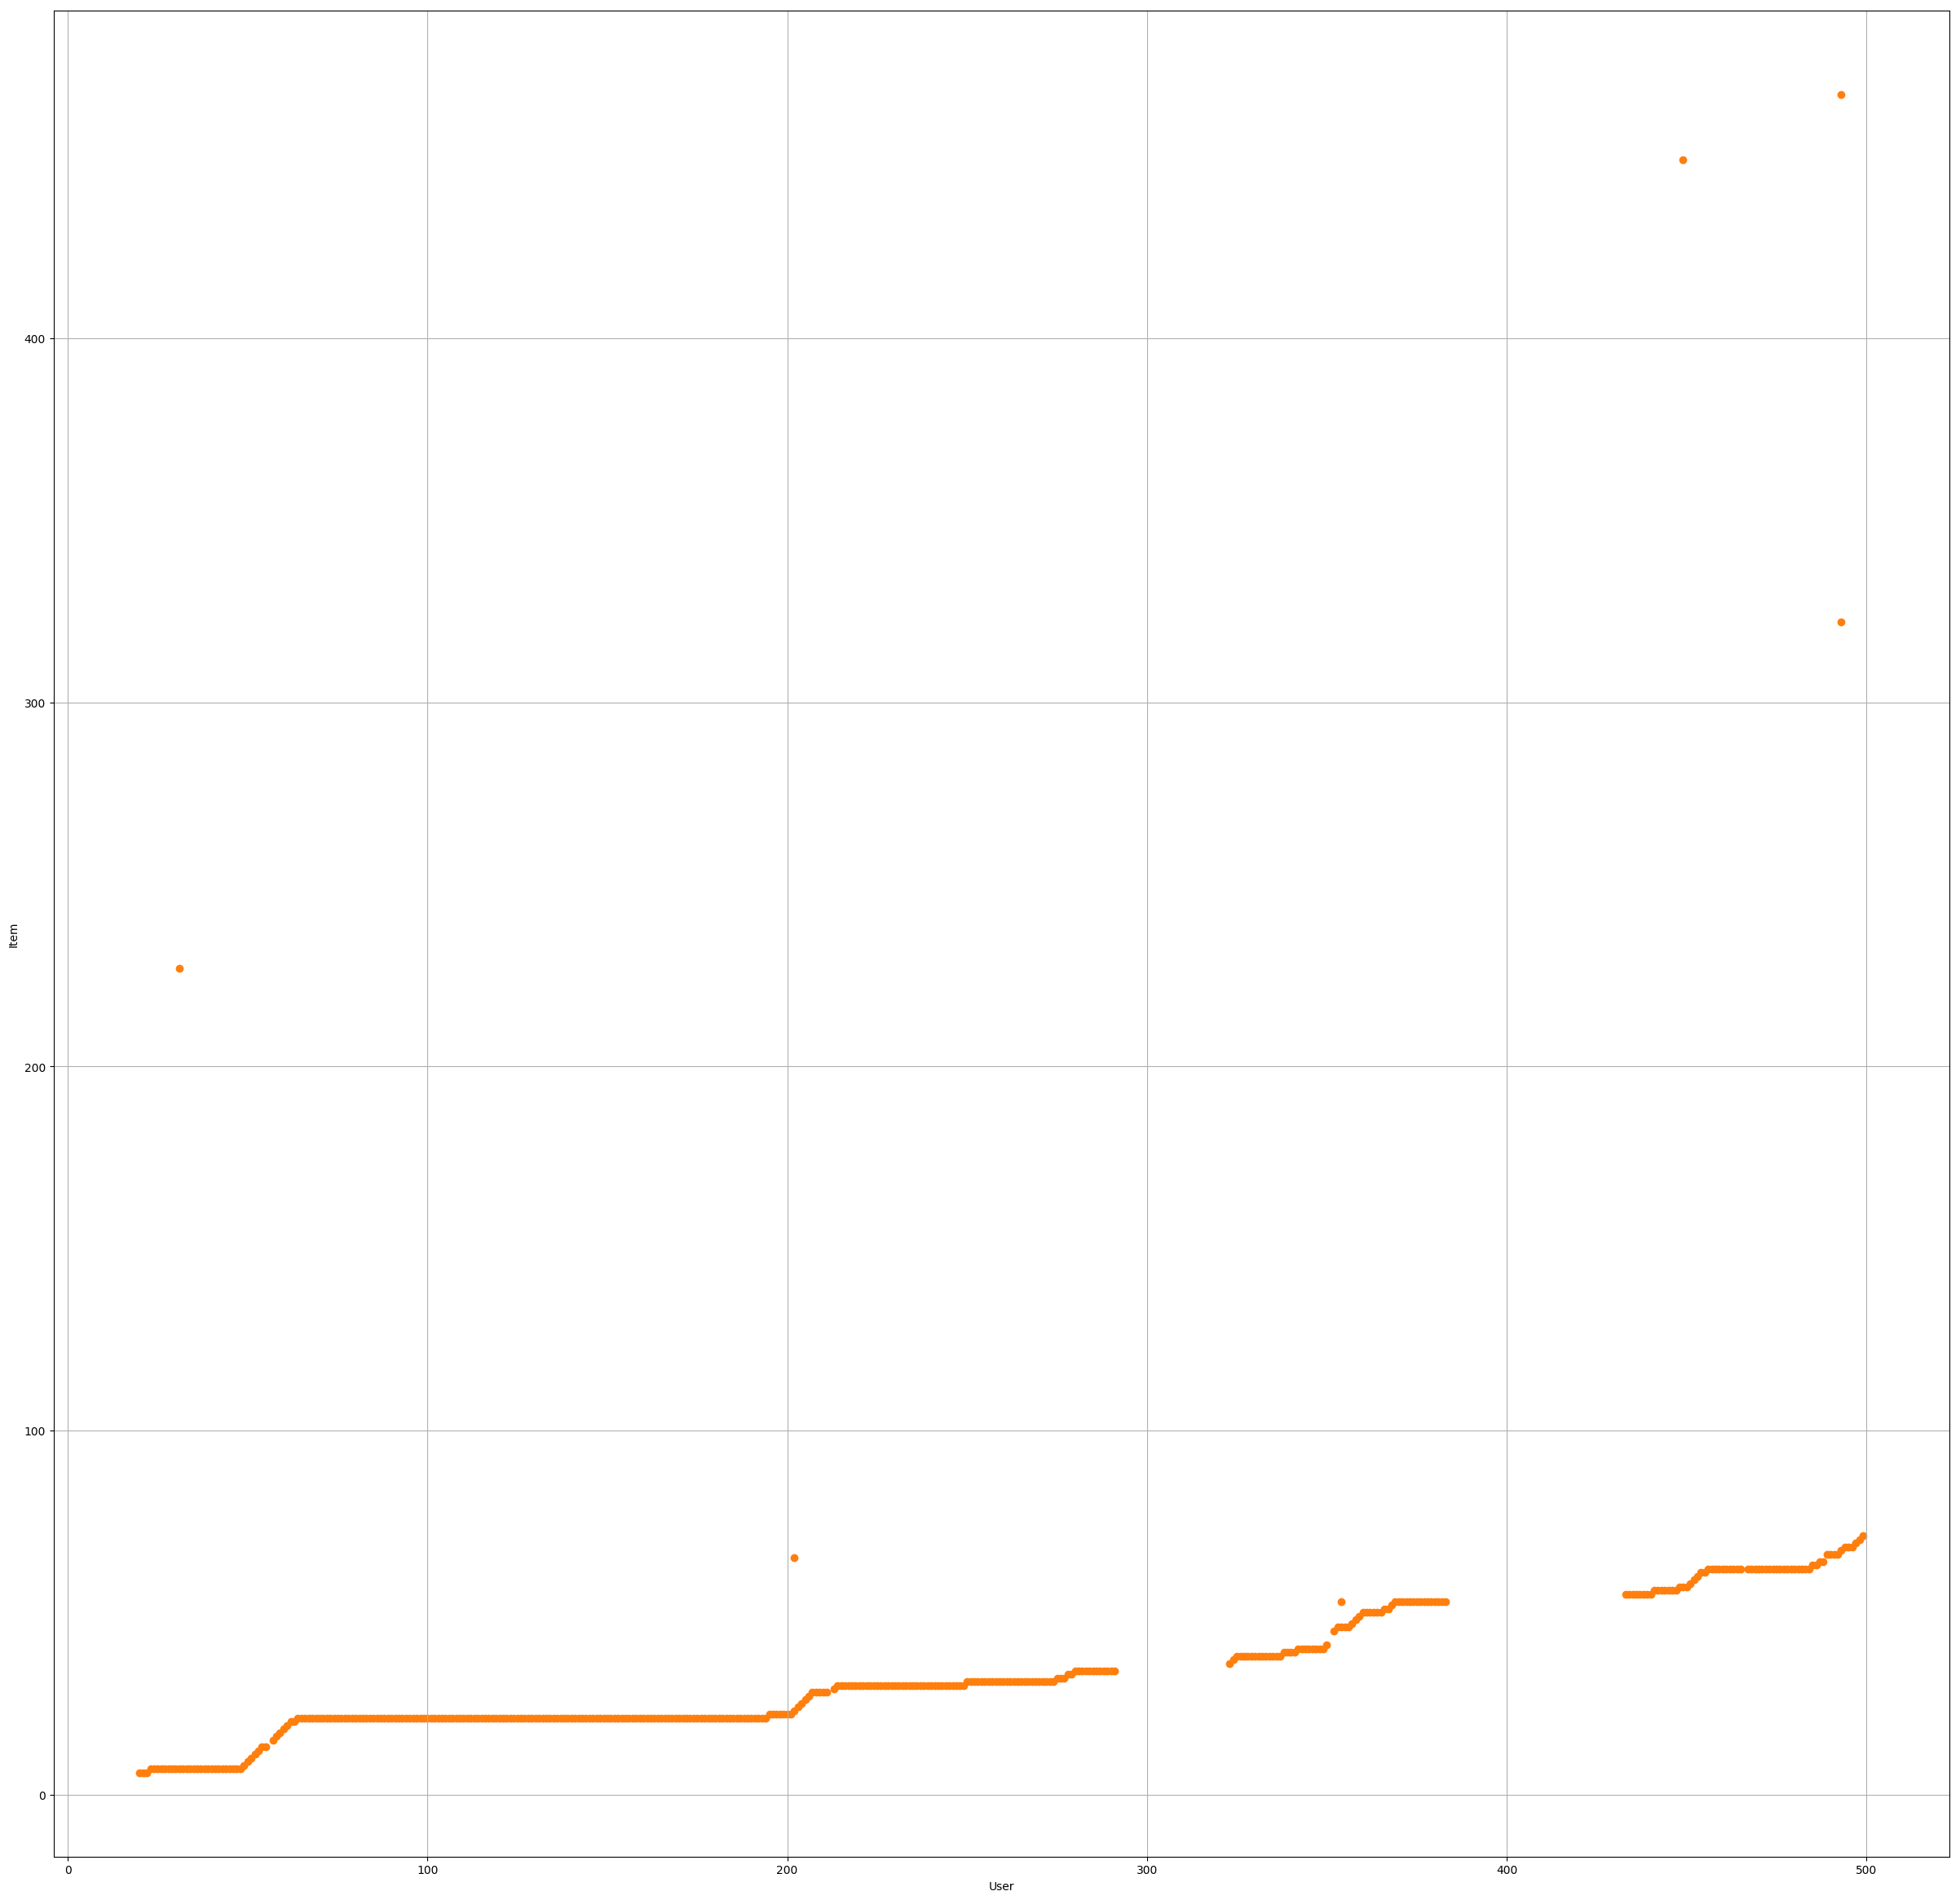

2
3
-1


In [33]:
#avg_global = degree_count(len(G.nodes()), G.edges())
#print(avg_global)
color_list = []
label_dict = dict()
for cluster in set(labels):
    label_dict[cluster] = []
for index, l in enumerate(labels):
    label_dict[l].append(index)

for cluster in label_dict.keys():
    print(cluster)
    nodes = [index_nodes[index] for index in label_dict[cluster]]
    T  = G.subgraph(nodes)
    scatter_plot_bigram(T.edges())
    #avg_degree = degree_count(len(T.nodes()), T.edges())
    #print(cluster, avg_degree)